In [1]:
require 'daru'
require 'daru_plotting_plotly'
require 'rbplotly'
require 'hg'

class Numeric
  def mili
    self.to_f * 10**(-3)
  end
  
  def micro
    self.to_f * 10**(-6)
  end
end

Daru.plotting_library = :plotly

:plotly

# 実験10

In [2]:
Daru::DataFrame.from_csv('data/jikken10.csv', encoding: 'UTF-8').tap do |df|
  df.plot(x: 'Ib', y: 'Ic', layout: {title: 'Ic'}).show
  df.plot(x: 'Ib', y: 'Vc', layout: {title: 'Vc'}).show
  df.plot(x: 'Ib', y: 'Pc', layout: {title: 'トランジスタの消費電力'}).show
  df.plot(x: 'Ib', y: 'Pl', layout: {title: '電球の消費電力'}).show
  df.plot(x: 'Ib', y: 'ef', layout: {title: '変換効率'}).show
end

#<Plotly::Offline::HTML:0x007fd5eb0d0a48 @id="fbd008dc-7abe-4b66-82a4-c884cb3f11df", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.138, 0.133, 0.1179, 0.10300000000000001, 0.084, 0.0559, 0.028800000000000003, 0], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"Ic"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5e9b05d80 @id="355c388b-b5ce-4829-85de-c5d80f5768eb", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.2, 2.54, 10, 16.9, 24.2, 31.8, 34.3, 35.8], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"Vc"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea357268 @id="8e693914-c2e4-46a3-a542-6cb43f4dfece", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.027600000000000003, 0.33782, 1.179, 1.7407, 2.0328, 1.77762, 0.98784, 0.0], :type=>:scatter, :mode=>"", :name=>"Pc"}], @layout={:width=>1000, :height=>500, :title=>"トランジスタの消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eaa44ff8 @id="f51666d7-c5bb-43dc-a531-055c3540131c", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[4.9404, 4.4501800000000005, 3.0654000000000003, 1.9673000000000003, 0.9912000000000001, 0.23477999999999996, 0.04896000000000009, 0.0], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"電球の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea3773b0 @id="09e5d0bd-d528-4f2f-a441-9e5acd305498", @data=[{:x=>[0.0014, 0.0012, 0.001, 0.0008, 0.0006, 0.0004, 0.0002, 0.0], :y=>[0.9944444444444446, 0.9294444444444445, 0.7222222222222222, 0.5305555555555556, 0.3277777777777778, 0.11666666666666665, 0.0472222222222223, "NaN"], :type=>:scatter, :mode=>"", :name=>"ef"}], @layout={:width=>1000, :height=>500, :title=>"変換効率"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Daru::DataFrame(8x7)>
                    Ib         Ic         Vc       temp         Pc         Pl         ef
          0     0.0014      0.138        0.2        冷たい 0.02760000     4.9404 0.99444444
          1     0.0012      0.133       2.54        冷たい    0.33782 4.45018000 0.92944444
          2      0.001     0.1179         10        暖かい      1.179 3.06540000 0.72222222
          3     0.0008 0.10300000       16.9        暖かい     1.7407 1.96730000 0.53055555
          4     0.0006      0.084       24.2        暖かい     2.0328 0.99120000 0.32777777
          5     0.0004     0.0559       31.8        暖かい    1.77762 0.23477999 0.11666666
          6     0.0002 0.02880000       34.3        暖かい    0.98784 0.04896000 0.04722222
          7        0.0          0       35.8        暖かい        0.0        0.0        NaN

# 実験11

In [3]:
Daru::DataFrame.from_csv('data/jikken11.csv').tap do |df|
  df.plot(x: 'duty_ratio', y: 'Ic', layout: { title: 'コレクタ電流' }).show
  df.plot(x: 'duty_ratio', y: 'Vc', layout: { title: 'コレクタ電圧' }).show
  df.plot(x: 'duty_ratio', y: 'Pl', layout: { title: '負荷の消費電力' }).show
end
nil

#<Plotly::Offline::HTML:0x007fd5eb080070 @id="1fe30dca-89c3-4d4e-b87c-2e390a7f1037", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[0.032, 0.0465, 0.0619, 0.0828, 0.10200000000000001, 0.1118, 0.114, 0.124], :type=>:scatter, :mode=>"", :name=>"Ic"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電流"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eb2d35c0 @id="cb399d6a-46a4-4593-94dc-2113098bebce", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[31, 27.7, 23.8, 17.5, 11.9, 8.9, 8, 4.81], :type=>:scatter, :mode=>"", :name=>"Vc"}], @layout={:width=>1000, :height=>500, :title=>"コレクタ電圧"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eb2e1850 @id="c0ceec90-e007-4775-9855-112707a19290", @data=[{:x=>[12, 22, 33, 50, 66, 76, 78, 88], :y=>[1.1520000000000001, 1.674, 2.2283999999999997, 2.9808, 3.672, 4.0248, 4.104, 4.464], :type=>:scatter, :mode=>"", :name=>"Pl"}], @layout={:width=>1000, :height=>500, :title=>"負荷の消費電力"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験12

In [4]:
# 上り
Daru::DataFrame.from_csv('data/jikken_12_up.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
#下り
Daru::DataFrame.from_csv('data/jikken_12_down.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.add_vector :P, df[:Ia].to_a.zip(df[:Vak].to_a).map { |i, v| i * v }
  df.plot(x: :Ig, y: :Ia, layout: { title: "Ig - Ia", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Ia(A)' } }).show
  df.plot(x: :Ig, y: :Vak, layout: { title: "Ig - Vak", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'Vak(V)' } }).show
  df.plot(x: :Ig, y: :P, layout: { title: "Ig - P", xaxis: { title: 'Ig(A)' }, yaxis: { title: 'P(W)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fd5ea3dd1d8 @id="b81cda77-5f4d-4ea7-8b66-6847b349f888", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.1365, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eaa7fe78 @id="5406dd3f-3d34-4891-a750-25b6a996cf3a", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[36, 36, 36, 36, 36, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>"Vak"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eaa8c740 @id="937061f3-727d-42a5-94f6-83ca551c7d23", @data=[{:x=>[0.002, 0.004, 0.006, 0.008, 0.009000000000000001, 0.009800000000000001, 0.012, 0.014, 0.016, 0.018000000000000002], :y=>[0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.014400000000000001, 0.129675, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea3f6bb0 @id="0d231240-14d9-493f-9251-d8ff3535381d", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137, 0.137], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Ia", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea40f570 @id="72a34b8b-66be-4554-9e20-297b859ab838", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95], :type=>:scatter, :mode=>"", :name=>"Vak"}], @layout={:width=>1000, :height=>500, :title=>"Ig - Vak", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"Vak(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eaaac068 @id="1201bd48-3130-45c4-af7f-8970d87f5cf1", @data=[{:x=>[0.018000000000000002, 0.016, 0.014, 0.012, 0.01, 0.008, 0.006, 0.004, 0.002, 0.0], :y=>[0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002, 0.13015000000000002], :type=>:scatter, :mode=>"", :name=>:P}], @layout={:width=>1000, :height=>500, :title=>"Ig - P", :xaxis=>{:title=>"Ig(A)"}, :yaxis=>{:title=>"P(W)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験13

In [5]:
Daru::DataFrame.from_csv('data/jikken_13.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  df.plot(x: :Vak, y: :Ia, layout: { title: 'Ia - Vak', xaxis: { title: 'Vak(V)' }, yaxis: { title: 'Ia(A)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fd5e9b1d930 @id="9f981d13-0725-4387-8ede-2fd5be411489", @data=[{:x=>[0.77, 0.76, 0.758, 0.754, 0.778, 0.81, 0.8, 0.81, 1.84, 1.75, 1.58, 1.38, 1.19, 0.98, 0.8, 0.6, 0.4, 0.2, 0.1], :y=>[0.0684, 0.06, 0.0489, 0.04020000000000001, 0.0282, 0.0249, 0.024300000000000002, 0.023780000000000003, 0.0009000000000000001, 0.0009000000000000001, 0.0009000000000000001, 0.0005, 0.00045000000000000004, 0.0004, 0.00034, 0.00024, 0.0002, 0.00013000000000000002, 0.0001], :type=>:scatter, :mode=>"", :name=>"Ia"}], @layout={:width=>1000, :height=>500, :title=>"Ia - Vak", :xaxis=>{:title=>"Vak(V)"}, :yaxis=>{:title=>"Ia(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

## Vakのターンオン時

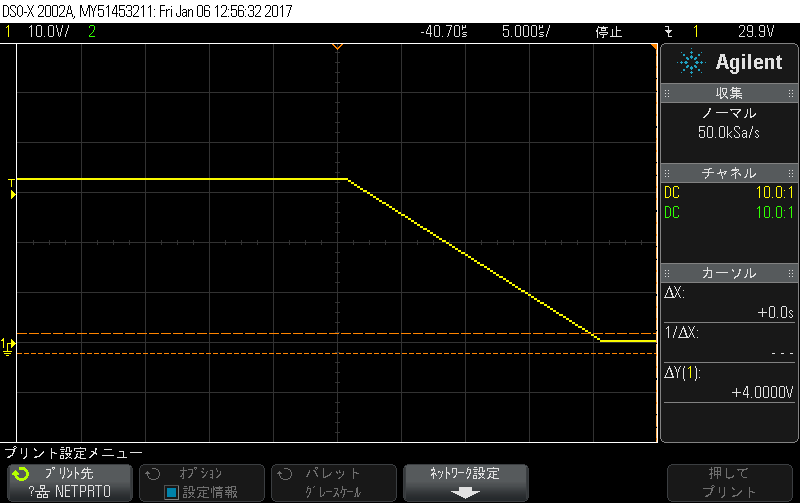

In [6]:
File.open('data/Vak_turn_on.png')

## Iaのターンオン時
### 全体

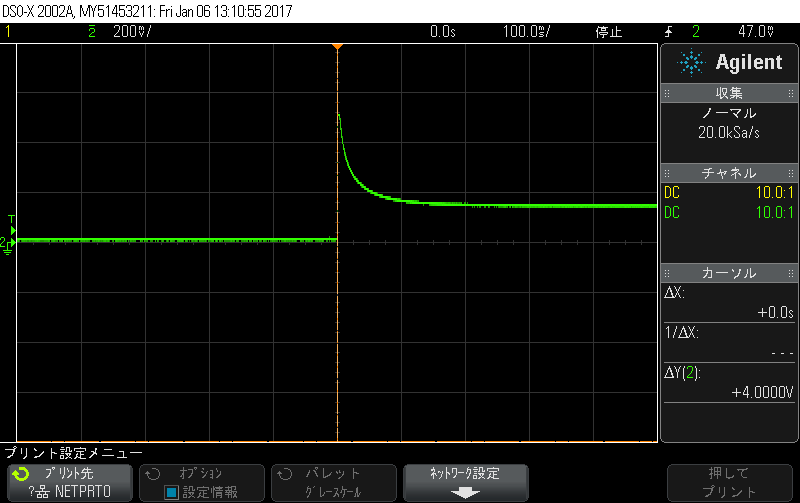

In [7]:
File.open('data/Ia_turn_on_1.png')

### 拡大

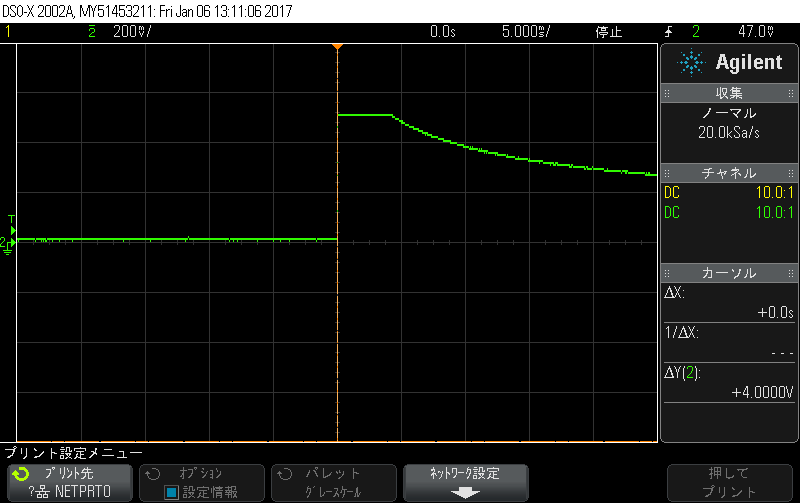

In [8]:
File.open('data/Ia_turn_on_2.png')

# 実験14

In [9]:
Daru::DataFrame.from_csv('data/jikken_14.csv').tap do |df|
  df.vectors = Daru::Index.new(df.vectors.to_a.map(&:to_sym))
  half_period = 4.0
  df[:alpha] = df[:length].to_a.map { |it| it / half_period * Math::PI }
  df.plot(x: :alpha, y: :V, layout: { title: 'alpha - V', xaxis: { title: 'alpha' }, yaxis: { title: 'V(V)' } }).show
  df.plot(x: :alpha, y: :I, layout: { title: 'alpha - I', xaxis: { title: 'alpha' }, yaxis: { title: 'I(A)' } }).show
end
nil

#<Plotly::Offline::HTML:0x007fd5ea48ed48 @id="84f68aeb-61ff-44b3-a852-6b8b1d4e4a10", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[103.0, 99.0, 90.5, 77.0, 55.0, 32.5, 10.0], :type=>:scatter, :mode=>"", :name=>"V"}], @layout={:width=>1000, :height=>500, :title=>"alpha - V", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"V(V)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea4df5e0 @id="bf619b31-db0d-479d-933a-d968e5b31f40", @data=[{:x=>[0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069], :y=>[0.25, 0.245, 0.23, 0.21, 0.179, 0.138, 0.082], :type=>:scatter, :mode=>"", :name=>"I"}], @layout={:width=>1000, :height=>500, :title=>"alpha - I", :xaxis=>{:title=>"alpha"}, :yaxis=>{:title=>"I(A)"}}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

# 実験15

## フーリエ級数展開

In [38]:
dt = 1/2000.0 * 2 * Math::PI
['0.25', '0.5', '0.6', '0.75'].each do |name|
  Daru::DataFrame.from_csv("data/jikken15/_#{name}.csv").tap do |df|
    df.map_rows! { |row| row['Volt'] = row['Volt'] || 0.0 ; row  }
    df.add_vector :x, df.index.to_a.map { |it| it.to_f * dt }
  end.tap do |df|
    degree = 101
    a0 = (2.0/(1999*dt)) * dt * df['Volt'].sum
    a = (1..degree).map do |n|
      (1 / Math::PI) * df.map_rows do |row|
        Math.cos(n * row[:x]) * row['Volt'] * dt
      end.sum
    end
    b = (1..degree).map do |n|
      (1 / Math::PI) * df.map_rows do |row|
        Math.sin(n * row[:x]) * row['Volt'] * dt
      end.sum
    end
    xs = (0..1999).to_a.map {|i| i * dt }
    ys = xs.map { |i| a0 + (1..degree).map { |n| a[n - 1] * Math.cos(n * i) + b[n - 1] * Math.sin(n * i) }.sum }
    Plotly::Plot.new(data: [
      { x: xs , y: ys, name: 'フーリエ級数から復元した波形' },
      { x: df[:x].to_a, y: df['Volt'].to_a, name: '元の波形' }
      ], layout: {
        xaxis: { title: '位相' },
        yaxis: { title: '電圧' },
        title: "α = #{name}π"
        }).show

    coeffs = Daru::DataFrame.new(
      { i: (1..degree), a: a, b: b },
      { order: [:i, :a, :b] }
      )
    puts "a0: #{a0}"
    coeffs.plot(x: :i, y: :a, type: :bar, layout: { title: 'a' }).show
    coeffs.plot(x: :i, y: :b, type: :bar, layout: { title: 'b' }).show
  end
end
nil

#<Plotly::Offline::HTML:0x007fd5ea27b0b0 @id="a6e34a59-744f-49dc-9925-ac166cc2b23b", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.021991148575128554, 0.025132741228718346, 0.02827433388230814, 0.031415926535897934, 0.034557519189487726, 0.03769911184307752, 0.04084070449666731, 0.04398229715025711, 0.0471238898038469, 0.05026548245743669, 0.053407075111026485, 0.05654866776461628, 0.059690260418206076, 0.06283185307179587, 0.06597344572538566, 0.06911503837897545, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692443, 0.08796459430051422, 0.09110618695410401, 0.0942477796076938, 0.0973893722612836, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564276, 0.11309733552923255, 0.11623892818282235, 0.11938052083641215, 0.12252211349000194, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.1350884841043611, 0.1382300767579509, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384885, 0.17278759594743864, 0.17592918860102844, 0.17907078125461823, 0.18221237390820802, 0.1853539665617978, 0.1884955592153876, 0.1916371518689774, 0.1947787445225672, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128552, 0.22305307840487532, 0.2261946710584651, 0.2293362637120549, 0.2324778563656447, 0.2356194490192345, 0.2387610416728243, 0.2419026343264141, 0.2450442269800039, 0.24818581963359368, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.2670353755551324, 0.2701769682087222, 0.27331856086231204, 0.2764601535159018, 0.2796017461694916, 0.2827433388230814, 0.2858849314766712, 0.289026524130261, 0.2921681167838508, 0.29530970943744056, 0.2984513020910304, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.3235840433197487, 0.3267256359733385, 0.3298672286269283, 0.33300882128051806, 0.3361504139341079, 0.3392920065876977, 0.34243359924128747, 0.3455751918948773, 0.34871678454846705, 0.35185837720205687, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.3707079331235956, 0.3738495257771854, 0.3769911184307752, 0.38013271108436497, 0.3832743037379548, 0.38641589639154456, 0.3895574890451344, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.40526545231308336, 0.4084070449666731, 0.41154863762026295, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.43982297150257105, 0.44296456415616087, 0.44610615680975063, 0.44924774946334045, 0.4523893421169302, 0.45553093477052004, 0.4586725274241098, 0.4618141200776996, 0.4649557127312894, 0.4680973053848792, 0.471238898038469, 0.4743804906920588, 0.4775220833456486, 0.48066367599923837, 0.4838052686528282, 0.48694686130641796, 0.4900884539600078, 0.49323004661359754, 0.49637163926718736, 0.4995132319207771, 0.5026548245743669, 0.5057964172279568, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102648, 0.5372123437638546, 0.5403539364174444, 0.5434955290710343, 0.5466371217246241, 0.5497787143782138, 0.5529203070318036, 0.5560618996853934, 0.5592034923389833, 0.562345084992573, 0.5654866776461628, 0.5686282702997526, 0.5717698629533424, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677016, 0.5874778262212913, 0.5906194188748811, 0.5937610115284709, 0.596902604182

a0: -4.759540682013708


#<Plotly::Offline::HTML:0x007fd5eaa66b58 @id="ed4482d3-848f-4086-af46-f402d8f66b37", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[23.225027427719883, -0.6200644223942687, -2.406288878979261, -0.93610603335575, -14.821732942854029, 0.07609719031922348, -8.407297465118061, 0.8761984212436204, 4.274823513237238, -0.11529892597883788, 2.1377161840386156, -0.8044063270606694, -4.697819369132642, 0.25007084900663007, -2.434919001267202, 0.8807981823946223, 2.766730956905636, -0.12339942149839257, 1.7143171217476851, -0.8137933915132028, -2.3764522970166553, 0.1355062351132595, -1.655827532148218, 0.8501527104052882, 1.83508990651711, -0.20352000275718277, 0.8251003787719333, -0.8239352522785497, -1.976022853039768, 0.3098789929730241, -0.9727995533623007, 0.8570128742336778, 1.2851424844661994, -0.14680291465845816, 0.6142922460720215, -0.6788048264603463, -1.2462370487179872, 0.22354335062491554, -0.6330668105438748, 0.794552913063874, 1.021284460483138, -0.2439951872708961, 0.4527362135650766, -0.6533782274386959, -1.0359787208071172, 0.31247373474547013, -0.4209966132850911, 0.7589871543656805, 0.8324346731335054, -0.22066949742605677, 0.33144518020274005, -0.638996804163399, -0.7641824045043849, 0.30150152001415104, -0.31988414633143575, 0.6944623418549554, 0.686643289222262, -0.22995746462790229, 0.24499274343180263, -0.6046416038136617, -0.5877319834659815, 0.355929320996768, -0.20227387935747382, 0.7114642384121678, 0.5627057763529353, -0.29565937525457403, 0.15960612621573397, -0.5942068604265285, -0.4633728705103836, 0.37330834806995333, -0.14144375362759573, 0.6238415470775851, 0.4368551597478838, -0.2780548586052135, 0.10476609364376119, -0.5777697044582863, -0.29479023445521185, 0.3944851458268423, -0.10746096762663794, 0.5825874324807752, 0.3264353010424387, -0.31432807688528197, 0.05619508915088303, -0.5128284875030378, -0.23921348368237466, 0.41010423142082175, -0.019448772354140897, 0.549250619021318, 0.20073542852491083, -0.35468883444620714, 0.06693856049648085, -0.4698005556918404, -0.16502239833993942, 0.37600846965482876, 0.022243134150888928, 0.44909466475169435, 0.13041132607017292, -0.3387369026224036, 0.04514543947759893, -0.41095992244489277, -0.07808193217201194], :type=>:bar, :mode=>"", :name=>:a}], @layout={:width=>1000, :height=>500, :title=>"a"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eb2c3620 @id="f8bedfaa-103e-4d5b-aa48-929537afa86f", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[-132.01148836972754, 1.9220127005892245, 20.503655749121464, 0.06786078303008722, 5.3217681127360725, -0.616783634917992, -8.30528718289873, 0.37738444601980226, -3.5046813006653603, 0.9822271935437449, 4.252524209294234, 0.05173078832565986, 3.279709806764524, -0.7608792035956085, -3.18874551641557, 0.0998516164175014, -2.3578055409071808, 0.9078942325844093, 2.713664173730943, -0.17510348830788633, 1.280335041663968, -0.7503694161415616, -2.4537990646110805, 0.31995315465791424, -1.31877205988594, 0.8360099378000788, 1.598540350542393, -0.04207812283628278, 0.9772491388578298, -0.6357377347510889, -1.4400916107385293, 0.278239374810551, -0.7344236938812321, 0.8714946326662207, 1.4343122354198319, -0.146566477043311, 0.704895774191998, -0.619332036351919, -1.11631006185067, 0.29243175146854655, -0.4528552737021453, 0.8110169523612146, 1.0470572882015932, -0.1422088832849287, 0.5016906320724408, -0.6396834033035221, -0.862419397165592, 0.30956924651027484, -0.3211392375365456, 0.7127010965938532, 0.8916256958300003, -0.20904028293591395, 0.3973170045327377, -0.5734453973494082, -0.6863727788251567, 0.3677581735829112, -0.1970344217171308, 0.7291384056752728, 0.6881513934983366, -0.2581295480167541, 0.2958275604076793, -0.57365138042346, -0.5163287179185077, 0.3572893262450484, -0.1005369211073882, 0.6611873086998589, 0.5511153215590769, -0.26709320694009886, 0.21740453155937867, -0.5987237884583119, -0.4171918748079133, 0.3660371048283814, -0.04989061452104454, 0.6034424334004105, 0.38578893550037974, -0.29978638410145797, 0.15818614995089864, -0.5466162096864119, -0.2876255594584524, 0.33047560483039307, -0.0760095001551684, 0.582768398060905, 0.3221477776664204, -0.3415772128523605, 0.07757607641794523, -0.5274972711088424, -0.20692614026493703, 0.34357968170738584, -0.0007156502319799223, 0.5233238503867941, 0.2389166922054252, -0.3602520756073159, 0.06804487522643038, -0.453550384891113, -0.11131564143234911, 0.3588607947647559, -0.014451322615455012, 0.4762814760632771, 0.10085698904689677, -0.3614379535598706, 0.021038406218634786], :type=>:bar, :mode=>"", :name=>:b}], @layout={:width=>1000, :height=>500, :title=>"b"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea4e42c0 @id="27d9834f-154e-4b66-ae45-d0aa79707b54", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.021991148575128554, 0.025132741228718346, 0.02827433388230814, 0.031415926535897934, 0.034557519189487726, 0.03769911184307752, 0.04084070449666731, 0.04398229715025711, 0.0471238898038469, 0.05026548245743669, 0.053407075111026485, 0.05654866776461628, 0.059690260418206076, 0.06283185307179587, 0.06597344572538566, 0.06911503837897545, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692443, 0.08796459430051422, 0.09110618695410401, 0.0942477796076938, 0.0973893722612836, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564276, 0.11309733552923255, 0.11623892818282235, 0.11938052083641215, 0.12252211349000194, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.1350884841043611, 0.1382300767579509, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384885, 0.17278759594743864, 0.17592918860102844, 0.17907078125461823, 0.18221237390820802, 0.1853539665617978, 0.1884955592153876, 0.1916371518689774, 0.1947787445225672, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128552, 0.22305307840487532, 0.2261946710584651, 0.2293362637120549, 0.2324778563656447, 0.2356194490192345, 0.2387610416728243, 0.2419026343264141, 0.2450442269800039, 0.24818581963359368, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.2670353755551324, 0.2701769682087222, 0.27331856086231204, 0.2764601535159018, 0.2796017461694916, 0.2827433388230814, 0.2858849314766712, 0.289026524130261, 0.2921681167838508, 0.29530970943744056, 0.2984513020910304, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.3235840433197487, 0.3267256359733385, 0.3298672286269283, 0.33300882128051806, 0.3361504139341079, 0.3392920065876977, 0.34243359924128747, 0.3455751918948773, 0.34871678454846705, 0.35185837720205687, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.3707079331235956, 0.3738495257771854, 0.3769911184307752, 0.38013271108436497, 0.3832743037379548, 0.38641589639154456, 0.3895574890451344, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.40526545231308336, 0.4084070449666731, 0.41154863762026295, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.43982297150257105, 0.44296456415616087, 0.44610615680975063, 0.44924774946334045, 0.4523893421169302, 0.45553093477052004, 0.4586725274241098, 0.4618141200776996, 0.4649557127312894, 0.4680973053848792, 0.471238898038469, 0.4743804906920588, 0.4775220833456486, 0.48066367599923837, 0.4838052686528282, 0.48694686130641796, 0.4900884539600078, 0.49323004661359754, 0.49637163926718736, 0.4995132319207771, 0.5026548245743669, 0.5057964172279568, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102648, 0.5372123437638546, 0.5403539364174444, 0.5434955290710343, 0.5466371217246241, 0.5497787143782138, 0.5529203070318036, 0.5560618996853934, 0.5592034923389833, 0.562345084992573, 0.5654866776461628, 0.5686282702997526, 0.5717698629533424, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677016, 0.5874778262212913, 0.5906194188748811, 0.5937610115284709, 0.596902604182

a0: -4.55328176903809


#<Plotly::Offline::HTML:0x007fd5ea426a18 @id="cbb57945-407a-47c2-aa1b-f1ebff51b564", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[47.89324515411205, -1.6770110383251526, -45.90491815316024, 1.4670574641564749, 15.422560879601674, -1.275995049110486, -16.116654349005007, 1.3634355880195685, 8.705763171310252, -1.2102052213908565, -8.895686912844523, 1.2948284617643486, 5.893172521449487, -1.0464247861887512, -5.802719463668181, 1.3304449540219168, 5.02902063780253, -1.1053766936439264, -4.320245902214144, 1.2632176589787136, 4.184821445890886, -1.2481803414797437, -3.5813127857903457, 1.2340475181535087, 3.2696900863422567, -1.1609611094889578, -2.73825982629529, 1.0509111320344766, 2.45719066877861, -1.1114347558033337, -2.4820101388624045, 1.1159569325846324, 2.192171380567067, -1.0565672349810025, -1.9806612704429567, 1.0917998433148004, 1.8919234261724918, -0.9744222570329693, -1.6081577530484334, 0.9934279624147611, 1.5418724601108367, -0.9928572028554261, -1.3184233322938996, 0.9747263310978632, 1.326336136225096, -0.89271817662695, -1.15749164352816, 0.8876765998286585, 1.075981975189905, -0.9002614297160824, -0.9383743942512995, 0.8752420259734949, 0.9250005584823059, -0.8023473970983735, -0.7695565850287674, 0.7321550380276401, 0.7677403058784151, -0.7112501842251916, -0.5978439192761779, 0.6972492873802535, 0.5953354102043119, -0.673408510397167, -0.5891832506565475, 0.6904743190588472, 0.48531532388419163, -0.5681392042529254, -0.47570967185522567, 0.5778925168319764, 0.404157092060095, -0.5392395675311082, -0.34639702106276016, 0.5256565529263127, 0.28954550159864056, -0.48300826886426024, -0.22315960048509628, 0.4713202527717822, 0.19707440581520194, -0.4132481221120043, -0.19954034513696686, 0.3926845704280213, 0.19700905099991714, -0.3841521498914276, -0.1531751946587725, 0.29429505432943787, 0.15246244393084069, -0.26391515849765773, -0.0863966795413763, 0.2194600394279089, 0.0783071219640779, -0.23839220964329974, -0.029423915131116682, 0.18605927381450638, 0.0592223103926898, -0.1314596037426013, -0.05899704777650949, 0.17295543039544337, 0.04599844361341247, -0.11277953586061316, -0.05109523688594665, 0.035066722311215354, 0.05241447583046911], :type=>:bar, :mode=>"", :name=>:a}], @layout={:width=>1000, :height=>500, :title=>"a"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5eb2ea158 @id="80383efd-0e5e-490a-9af4-cc4c7ca06a89", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[-75.41337270995601, 0.6864903944439478, -4.4823904839271655, 0.3454376698881598, -0.3365502181953331, 0.10539205913849288, -2.7480655894050203, 0.4188048468057321, 1.472161791684868, -0.03878733408608163, -1.9298755625871655, 0.4388812558752041, 1.6804410512317298, -0.16494067807384238, -1.1704689740058114, 0.3489746488213454, 0.9355680892570007, -0.20468435054815434, -1.2299833328191667, 0.4243675409222057, 1.1544279542979923, -0.3757635239138969, -1.678254523459372, 0.5475019478911267, 1.0016570323953293, -0.41737587712737817, -1.460217814386132, 0.6489639757433998, 1.0290164117271348, -0.40148801617142665, -1.1981585738063718, 0.70486218310754, 1.0881458061459517, -0.47271003827242264, -1.0803864264590204, 0.7323269421871428, 1.1710477082783861, -0.565703806563539, -1.1044152653665558, 0.7877663203186875, 1.040139641342735, -0.6319428519069703, -1.0114500056736695, 0.7908633988415976, 1.0151143431043521, -0.6144664663502099, -0.9569064564198452, 0.8422926741154034, 0.9602616573692826, -0.726093211220468, -0.8612647578753875, 0.8987933760712015, 0.9390245612416962, -0.7323580525305997, -0.8350090742725462, 0.9347795623295612, 0.8506056854294876, -0.8020652717025819, -0.7431007375457084, 0.9187833665802001, 0.7997290628999251, -0.8042359254606156, -0.6650878532045685, 0.9722519690424455, 0.7228338823973106, -0.7712811306175634, -0.6394258041351656, 0.947385563235019, 0.6666407182779482, -0.8131940438805044, -0.526977817296988, 0.9866991704122442, 0.5940855082124405, -0.897784684180297, -0.5262780475051376, 1.0128149959480548, 0.528669026965897, -0.8682754019103236, -0.45261219951451925, 1.0007581792537787, 0.4897687204905283, -0.8682804775915797, -0.4144354600295998, 0.95864978599634, 0.41516034172378413, -0.8605986736470591, -0.2813906836869173, 0.9627956360876988, 0.3339772372994647, -0.889086294880229, -0.2500449977348577, 0.9581815529295968, 0.29896739289408936, -0.8371677237157399, -0.1815917708692322, 0.9447336779115376, 0.18277362816780846, -0.8523823767917885, -0.11043276167848083, 0.9149949709108394, 0.16108468612514795], :type=>:bar, :mode=>"", :name=>:b}], @layout={:width=>1000, :height=>500, :title=>"b"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5e9a974c0 @id="a948ce89-1394-41cf-807b-08723c1ba63e", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.021991148575128554, 0.025132741228718346, 0.02827433388230814, 0.031415926535897934, 0.034557519189487726, 0.03769911184307752, 0.04084070449666731, 0.04398229715025711, 0.0471238898038469, 0.05026548245743669, 0.053407075111026485, 0.05654866776461628, 0.059690260418206076, 0.06283185307179587, 0.06597344572538566, 0.06911503837897545, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692443, 0.08796459430051422, 0.09110618695410401, 0.0942477796076938, 0.0973893722612836, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564276, 0.11309733552923255, 0.11623892818282235, 0.11938052083641215, 0.12252211349000194, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.1350884841043611, 0.1382300767579509, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384885, 0.17278759594743864, 0.17592918860102844, 0.17907078125461823, 0.18221237390820802, 0.1853539665617978, 0.1884955592153876, 0.1916371518689774, 0.1947787445225672, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128552, 0.22305307840487532, 0.2261946710584651, 0.2293362637120549, 0.2324778563656447, 0.2356194490192345, 0.2387610416728243, 0.2419026343264141, 0.2450442269800039, 0.24818581963359368, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.2670353755551324, 0.2701769682087222, 0.27331856086231204, 0.2764601535159018, 0.2796017461694916, 0.2827433388230814, 0.2858849314766712, 0.289026524130261, 0.2921681167838508, 0.29530970943744056, 0.2984513020910304, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.3235840433197487, 0.3267256359733385, 0.3298672286269283, 0.33300882128051806, 0.3361504139341079, 0.3392920065876977, 0.34243359924128747, 0.3455751918948773, 0.34871678454846705, 0.35185837720205687, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.3707079331235956, 0.3738495257771854, 0.3769911184307752, 0.38013271108436497, 0.3832743037379548, 0.38641589639154456, 0.3895574890451344, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.40526545231308336, 0.4084070449666731, 0.41154863762026295, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.43982297150257105, 0.44296456415616087, 0.44610615680975063, 0.44924774946334045, 0.4523893421169302, 0.45553093477052004, 0.4586725274241098, 0.4618141200776996, 0.4649557127312894, 0.4680973053848792, 0.471238898038469, 0.4743804906920588, 0.4775220833456486, 0.48066367599923837, 0.4838052686528282, 0.48694686130641796, 0.4900884539600078, 0.49323004661359754, 0.49637163926718736, 0.4995132319207771, 0.5026548245743669, 0.5057964172279568, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102648, 0.5372123437638546, 0.5403539364174444, 0.5434955290710343, 0.5466371217246241, 0.5497787143782138, 0.5529203070318036, 0.5560618996853934, 0.5592034923389833, 0.562345084992573, 0.5654866776461628, 0.5686282702997526, 0.5717698629533424, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677016, 0.5874778262212913, 0.5906194188748811, 0.5937610115284709, 0.596902604182

a0: -4.801018708670648


#<Plotly::Offline::HTML:0x007fd5e98ff4c8 @id="97a6b538-ab4e-4722-a926-a755cd23f791", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[40.67397876351831, -1.7289666213314396, -31.575135566392596, 0.24944917565683133, -6.1258560370896, 0.8453854527089275, 6.405643429293244, -1.4805503985706876, -11.286339013880108, 1.6383170188122442, 5.437144980118619, -0.7604326617573733, -2.112147379102537, -0.15149492974699277, -2.75053785729682, 1.231989145446117, 4.492012157749092, -1.5545259134637621, -4.2555528828924505, 1.3048586963548359, 2.170630321176824, -0.4213877217345039, 0.16398370120789496, -0.7502585933832338, -2.5858523443664394, 1.5509117039907498, 2.787114047181449, -1.4276873112727158, -2.3886005973817563, 0.9073245699406165, 0.44252275879910585, 0.24298786803027547, 0.9401169684261138, -1.0428710042605611, -1.9599155528808159, 1.641251977730306, 1.8422587348642776, -1.1762461307831389, -0.9666415024379703, 0.35341188539699414, -0.21926951218091367, 0.7451056708147772, 1.0958330906911566, -1.3387387255473413, -1.380809517917326, 1.4800711533353128, 0.9861661879418869, -0.7711572323750887, -0.2596658831969876, -0.10641825316601594, -0.45900738639375493, 1.0667031471297561, 0.9296179437140744, -1.3410871629160759, -0.8728137515360179, 1.1877512022842232, 0.4726101750772968, -0.2849390838210205, 0.06984863930802258, -0.531956059120049, -0.4802591457949341, 1.2591719155252652, 0.5802969963189631, -1.216729609013107, -0.41061152763242587, 0.7758251397868234, 0.12926071559458882, 0.17130139339134884, 0.2100441442983949, -0.8467100840584119, -0.29868501288019106, 1.2458156398755644, 0.3262514642638342, -0.9398139969560505, -0.12162791906933004, 0.36087316543171427, 0.021168573097405947, 0.5145766870424021, 0.13912246816494592, -0.9759319762502475, -0.08526185096282107, 1.0911007937910904, 0.08680032211837486, -0.5856076317995653, 0.02269420011482268, -0.05587515839058039, 0.023698154525848104, 0.7134387345598667, -0.007530352606506246, -0.9677285925475072, 0.10361258108048191, 0.8342438466837455, -0.07419722506547488, -0.21073088169906454, -0.012803621760382074, -0.3394305324463297, 0.14183801355355155, 0.8142800694670743, -0.18623996235170848, -0.7981304592613141, 0.19134253533280665], :type=>:bar, :mode=>"", :name=>:a}], @layout={:width=>1000, :height=>500, :title=>"a"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea93f928 @id="dea795a2-0615-4367-9bd5-a3cf6c333cc2", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[-44.200626669691346, -0.17457708733965593, -27.98988413658905, 1.9076939204359766, 17.152382617864408, -1.1851189543290883, -9.043012060811456, 0.864006640456575, 0.8002048925864528, 0.6446322871403006, 4.951436476277614, -1.1826340699340356, -6.0859900688391715, 1.7020018691380856, 5.31883212552898, -1.1355747489117978, -2.1544459868576524, 0.09789713492699396, -1.3767585232105057, 1.0260813408175369, 3.1773589831723523, -1.475133918245443, -3.80360015982751, 1.51281168075844, 2.0448848075085033, -0.5464139672853101, -0.26126155057084044, -0.33802074269432586, -1.5239374976581352, 1.473665870821777, 2.5107784416756456, -1.4705616591780792, -1.989463749545868, 1.1072079785461744, 0.9086273682530843, -0.009398482669795743, 0.6178616484286139, -0.827499780537603, -1.4578835772671637, 1.5420260628538978, 1.6806278125440672, -1.2623233878939977, -1.011881374132393, 0.6894955621147558, 0.10861766594047202, 0.4918633206163642, 0.7582009826050743, -1.1456048972824646, -1.087746748983797, 1.4706268187434521, 0.9884844732031722, -0.9203066799067595, -0.37417772476292194, 0.13769976013505666, -0.21343558172950333, 0.8816009981168549, 0.6850272237340598, -1.2520109157672084, -0.6793191657747752, 1.2653580642129785, 0.5489244171816633, -0.4874274199456514, 0.02008983684514227, -0.30717277473941673, -0.25160004708375094, 1.0807375104512251, 0.49620345523699505, -1.2081006644199948, -0.337935109778619, 0.876129871587435, 0.22105868528841044, -0.09919084707643785, 0.10730308993358306, -0.6493613948212597, -0.19688816939835468, 1.145894000919287, 0.1944918008845452, -1.0204381686240434, -0.07669793450160815, 0.4779356201187296, 0.02864272874106015, 0.2982102031068743, 0.05951645908437319, -0.8632557285526385, 0.015774850684182964, 1.075375676189263, -0.003005489095267448, -0.6969819990273665, 0.050954689717263954, 0.10383693344259563, 0.031822309171834644, 0.5637396095624099, -0.06973408536630003, -0.8960536955033626, 0.15684216936579484, 0.8478063607153745, -0.1334444402780573, -0.38745485205512326, 0.07361505781520618, -0.17933425329073177, 0.14841873992657614], :type=>:bar, :mode=>"", :name=>:b}], @layout={:width=>1000, :height=>500, :title=>"b"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea29a6b8 @id="ab12c904-8260-488c-b47f-780afd874b03", @data=[{:x=>[0.0, 0.0031415926535897933, 0.006283185307179587, 0.00942477796076938, 0.012566370614359173, 0.015707963267948967, 0.01884955592153876, 0.021991148575128554, 0.025132741228718346, 0.02827433388230814, 0.031415926535897934, 0.034557519189487726, 0.03769911184307752, 0.04084070449666731, 0.04398229715025711, 0.0471238898038469, 0.05026548245743669, 0.053407075111026485, 0.05654866776461628, 0.059690260418206076, 0.06283185307179587, 0.06597344572538566, 0.06911503837897545, 0.07225663103256524, 0.07539822368615504, 0.07853981633974483, 0.08168140899333462, 0.08482300164692443, 0.08796459430051422, 0.09110618695410401, 0.0942477796076938, 0.0973893722612836, 0.10053096491487339, 0.10367255756846318, 0.10681415022205297, 0.10995574287564276, 0.11309733552923255, 0.11623892818282235, 0.11938052083641215, 0.12252211349000194, 0.12566370614359174, 0.12880529879718153, 0.13194689145077132, 0.1350884841043611, 0.1382300767579509, 0.1413716694115407, 0.1445132620651305, 0.14765485471872028, 0.15079644737231007, 0.15393804002589986, 0.15707963267948966, 0.16022122533307945, 0.16336281798666924, 0.16650441064025903, 0.16964600329384885, 0.17278759594743864, 0.17592918860102844, 0.17907078125461823, 0.18221237390820802, 0.1853539665617978, 0.1884955592153876, 0.1916371518689774, 0.1947787445225672, 0.19792033717615698, 0.20106192982974677, 0.20420352248333656, 0.20734511513692636, 0.21048670779051615, 0.21362830044410594, 0.21676989309769573, 0.21991148575128552, 0.22305307840487532, 0.2261946710584651, 0.2293362637120549, 0.2324778563656447, 0.2356194490192345, 0.2387610416728243, 0.2419026343264141, 0.2450442269800039, 0.24818581963359368, 0.25132741228718347, 0.25446900494077324, 0.25761059759436306, 0.2607521902479528, 0.26389378290154264, 0.2670353755551324, 0.2701769682087222, 0.27331856086231204, 0.2764601535159018, 0.2796017461694916, 0.2827433388230814, 0.2858849314766712, 0.289026524130261, 0.2921681167838508, 0.29530970943744056, 0.2984513020910304, 0.30159289474462014, 0.30473448739820996, 0.3078760800517997, 0.31101767270538955, 0.3141592653589793, 0.31730085801256913, 0.3204424506661589, 0.3235840433197487, 0.3267256359733385, 0.3298672286269283, 0.33300882128051806, 0.3361504139341079, 0.3392920065876977, 0.34243359924128747, 0.3455751918948773, 0.34871678454846705, 0.35185837720205687, 0.35499996985564664, 0.35814156250923646, 0.3612831551628262, 0.36442474781641604, 0.3675663404700058, 0.3707079331235956, 0.3738495257771854, 0.3769911184307752, 0.38013271108436497, 0.3832743037379548, 0.38641589639154456, 0.3895574890451344, 0.39269908169872414, 0.39584067435231396, 0.3989822670059037, 0.40212385965949354, 0.40526545231308336, 0.4084070449666731, 0.41154863762026295, 0.4146902302738527, 0.41783182292744253, 0.4209734155810323, 0.4241150082346221, 0.4272566008882119, 0.4303981935418017, 0.43353978619539146, 0.4366813788489813, 0.43982297150257105, 0.44296456415616087, 0.44610615680975063, 0.44924774946334045, 0.4523893421169302, 0.45553093477052004, 0.4586725274241098, 0.4618141200776996, 0.4649557127312894, 0.4680973053848792, 0.471238898038469, 0.4743804906920588, 0.4775220833456486, 0.48066367599923837, 0.4838052686528282, 0.48694686130641796, 0.4900884539600078, 0.49323004661359754, 0.49637163926718736, 0.4995132319207771, 0.5026548245743669, 0.5057964172279568, 0.5089380098815465, 0.5120796025351363, 0.5152211951887261, 0.5183627878423159, 0.5215043804959056, 0.5246459731494955, 0.5277875658030853, 0.5309291584566751, 0.5340707511102648, 0.5372123437638546, 0.5403539364174444, 0.5434955290710343, 0.5466371217246241, 0.5497787143782138, 0.5529203070318036, 0.5560618996853934, 0.5592034923389833, 0.562345084992573, 0.5654866776461628, 0.5686282702997526, 0.5717698629533424, 0.5749114556069321, 0.578053048260522, 0.5811946409141118, 0.5843362335677016, 0.5874778262212913, 0.5906194188748811, 0.5937610115284709, 0.596902604182

a0: -4.899560444217631


#<Plotly::Offline::HTML:0x007fd5eb0538b8 @id="9db76a54-215c-47cf-ba3e-3f7beeb830cb", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[22.270949814025236, -0.43172795574864725, 0.09207934252090592, -1.0158232043663116, -16.026198653415094, 0.08381386311663204, -8.56164956452067, 1.0257088477208327, 4.0565895439589665, -0.023770015151974685, 2.93707122410578, -0.9383750001476336, -4.104922462204967, 0.11547003567107297, -3.116270863744761, 1.0285034791765775, 2.609708422306291, 0.00379250821578389, 2.2702855618592137, -1.0211959451269719, -2.344723001752639, -0.07404205387136771, -2.2031811787171023, 1.0075690789523237, 1.4264224132147503, 0.029808130559443688, 1.302280596258082, -0.9223994358132956, -1.5765767483366662, 0.07472541652454183, -1.4807103549430352, 1.0281589761055696, 1.1537307898541647, 0.1467145783893902, 1.197970219728038, -0.9078048491618212, -1.062846199062787, -0.04910368928726724, -1.0301978079972585, 0.9511432512545046, 0.8706331414948618, 0.09288686436370867, 0.8536835591332106, -0.8532820819719409, -0.8223082842648692, 0.004968145945297147, -0.797151889067852, 0.9550747429180596, 0.6888499516434081, 0.0701161394256117, 0.7112436796225029, -0.8219461895800703, -0.6026041226648509, -0.0036690644813224755, -0.6174606895579524, 0.8980519955552996, 0.5045704293480081, 0.10866823474974285, 0.5659862092352526, -0.789258672853143, -0.42273921527874453, -0.03495934600729397, -0.4391612815187931, 0.8444365209015813, 0.3950230609867589, 0.11548635989271447, 0.4102706413716, -0.7685038904524761, -0.29182178090110195, -0.04515640267748179, -0.3270495251198897, 0.7919293552852298, 0.30955144793654127, 0.08608880660360753, 0.3450936775462648, -0.7563060065981669, -0.22461412504790404, -0.08674036127595776, -0.20075030519682371, 0.794663499335371, 0.18470428200817843, 0.11715567436670003, 0.22741949371060274, -0.7111200728753442, -0.16173561164894798, -0.08619829563892485, -0.10944637045059545, 0.744284665811198, 0.14464398846593582, 0.08603606203751311, 0.13475378338860702, -0.6634694677203882, -0.06571127834383741, -0.06667920909287285, -0.06495607515886434, 0.6700966381365997, 0.07429399026314149, 0.07741289955910309, 0.07035102800569037, -0.6190907117394296, -0.01916638371842918], :type=>:bar, :mode=>"", :name=>:a}], @layout={:width=>1000, :height=>500, :title=>"a"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

#<Plotly::Offline::HTML:0x007fd5ea884a38 @id="b5b7ef93-1cbd-4ddb-a84c-6730773cdaa4", @data=[{:x=>[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101], :y=>[-14.118184627967558, -0.492243983601055, -24.06020296572258, 0.7190650289772231, -8.471775097193664, 1.24434379237017, 7.6730246976500025, 0.15673455331285702, 4.991644267257236, -0.8053528503849033, -4.0440863264901985, 0.18039696971603222, -2.892993765132069, 1.004567071708612, 3.3732992175440963, -0.006731655446640808, 2.5977252554135255, -0.8736100657911501, -2.619180659993408, 0.04525875241589066, -2.224796371943216, 1.0264842095517295, 1.8718770828724831, 0.10909083137477882, 1.6670502201277453, -0.7955268003125553, -1.5610369220591203, 0.17107015538166462, -1.3594662253967509, 1.0192010612922344, 1.473993419506939, 0.040231839756091244, 1.4117140434953763, -0.9180844439456545, -1.0772335174661583, -0.03813613523683761, -1.1209743168861621, 0.9836415468343747, 1.005311447030278, 0.12217987211736683, 0.9747628652182033, -0.919390955970834, -0.7909987404835966, 0.0016469534108774437, -0.7639475502867986, 0.9392688621458448, 0.7616687812630396, 0.08558109816079383, 0.7856321259010807, -0.8565863929814815, -0.5825146270026759, -0.04353372486892657, -0.6016029419127096, 0.8995414737666413, 0.5509607712314758, 0.1072538083686191, 0.6129942304483093, -0.8421717746062971, -0.40296968697307745, -0.049180920772070744, -0.47751937880305956, 0.8586870591540557, 0.4092219330705022, 0.09935315590605781, 0.4524148253545305, -0.784088047709401, -0.2986973747126208, -0.07662380933344883, -0.33537889835963564, 0.8017821817873672, 0.31389274299841025, 0.11051107812989895, 0.33802175035122184, -0.7718763840332266, -0.23248438963338558, -0.06981959931652172, -0.21195235117979705, 0.7301803312442794, 0.2422535089171722, 0.10523333000008701, 0.24845560659405255, -0.7762183077752736, -0.16744144360817464, -0.057410001751996356, -0.14245685674380085, 0.7310785860455702, 0.14818351615341233, 0.08836105957764703, 0.13875729910327939, -0.6977825203884037, -0.07093307442236695, -0.06300038048276091, -0.08096109797118006, 0.6759321607740508, 0.03692294640815112, 0.09746365050071375, 0.05587350722927969, -0.6293776071320127, -0.04886015228944855, -0.07555111652581151, -0.005515224329354325], :type=>:bar, :mode=>"", :name=>:b}], @layout={:width=>1000, :height=>500, :title=>"b"}, @config={:linkText=>"Export to plot.ly", :showLink=>true}, @embedded=true>

## オシロスコープの画像

## $\alpha = 0.25 \pi$

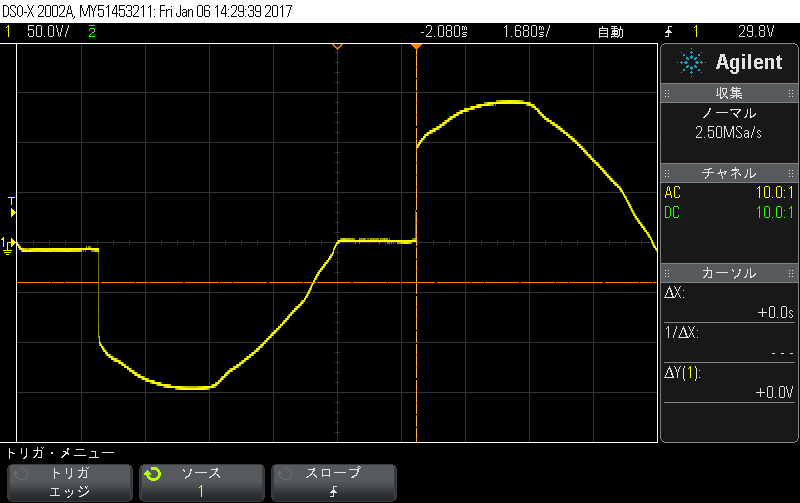

In [11]:
File.open('data/jikken15/_0.25.png')

## $\alpha = 0.5 \pi$

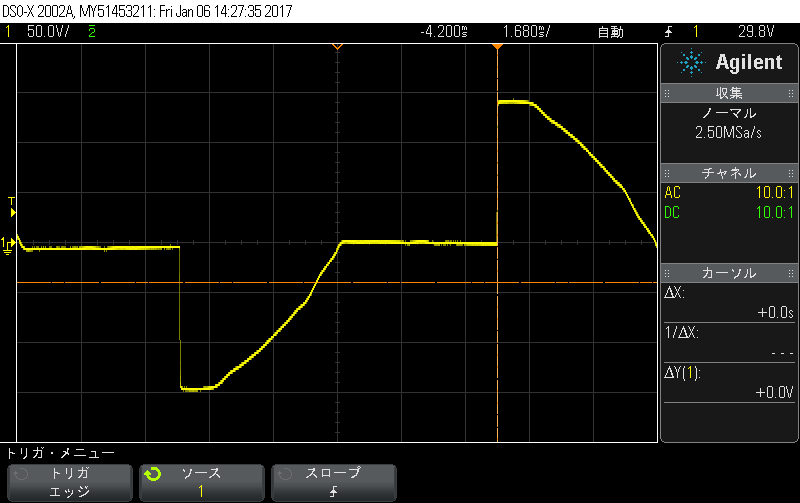

In [12]:
File.open('data/jikken15/_0.5.png')

## $\alpha = 0.6 \pi$

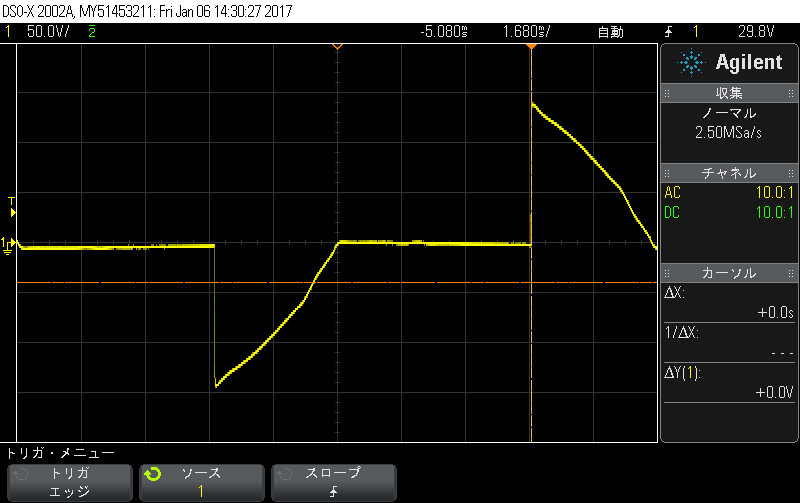

In [13]:
File.open('data/jikken15/_0.6.png')

## $\alpha = 0.75 \pi$

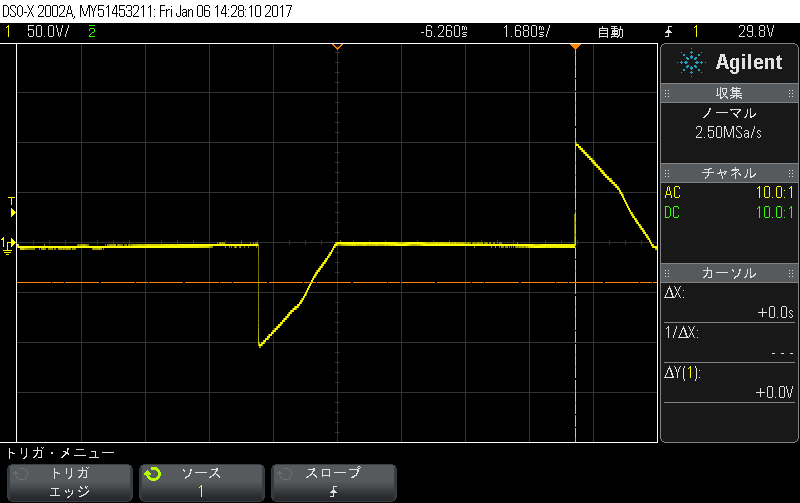

In [14]:
File.open('data/jikken15/_0.75.png')